In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

In [2]:
# Load CSV into DataFrame
df = pd.read_csv("Iris.csv")

In [3]:
# Explore the dataset
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("First 5 rows:")
print(df.head())
print("\n" + "="*50)
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("Basic Statistics:")
print(df.describe())

Dataset Shape: (150, 6)

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1)

In [4]:
# 1. List features and their types
print("FEATURE TYPES IN THE DATASET")
print("="*50)
print(df.dtypes)
print("\n")

# Separate numeric and nominal features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
nominal_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Features:", numeric_features)
print("Nominal Features:", nominal_features)

FEATURE TYPES IN THE DATASET
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


Numeric Features: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Nominal Features: ['Species']


IndexError: index 4 is out of bounds for axis 0 with size 4

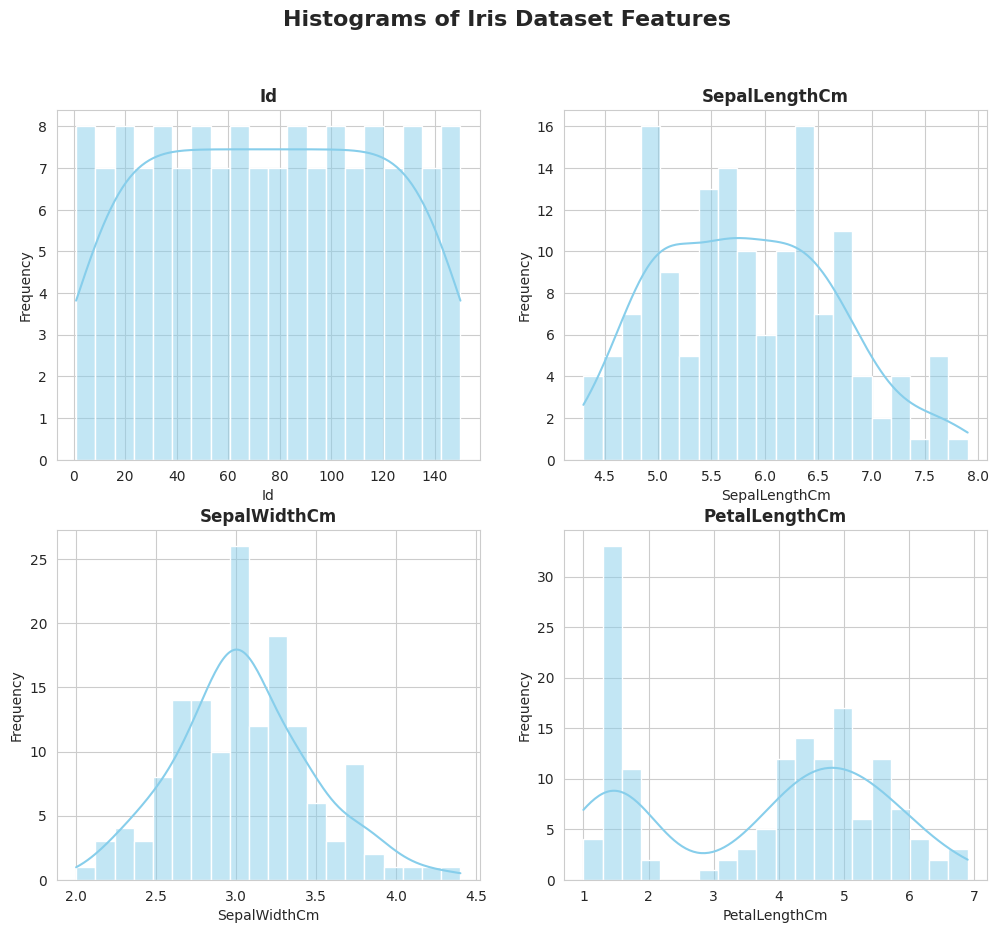

In [5]:
#  Create histograms for each feature using seaborn
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms of Iris Dataset Features', fontsize=16, fontweight='bold')

axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', ax=axes[idx])
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


IndexError: index 4 is out of bounds for axis 0 with size 4

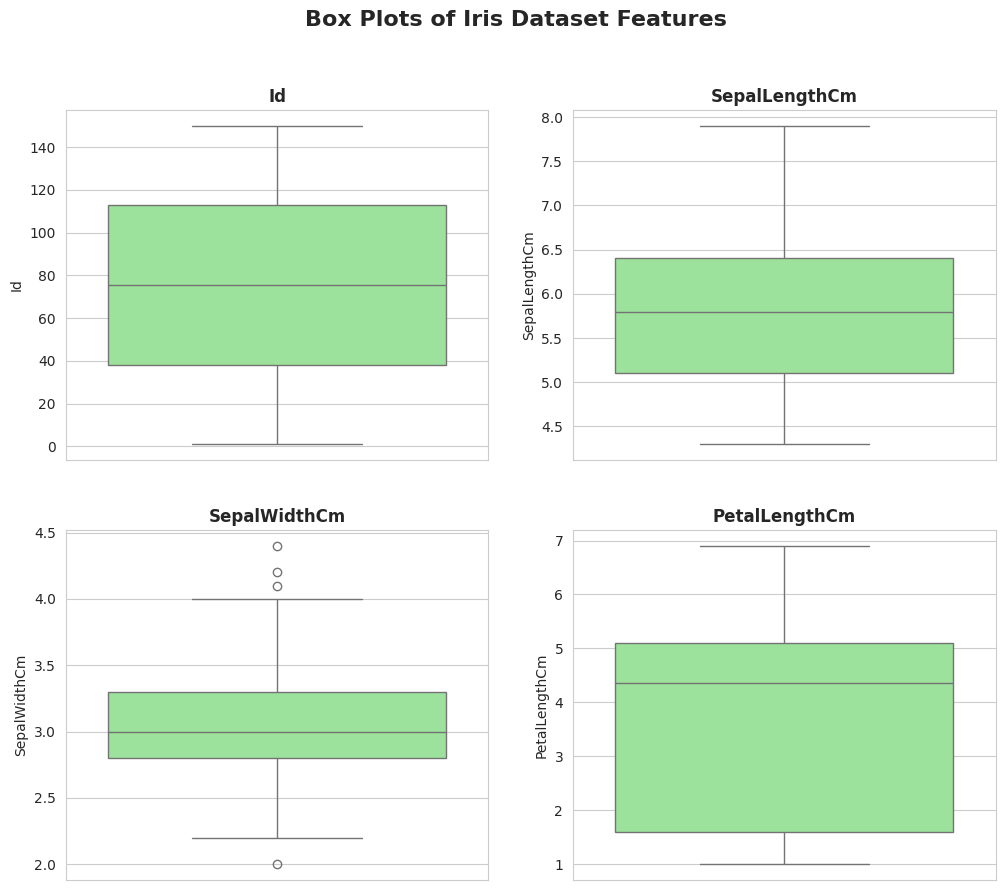

In [6]:
# Create box plots for each feature using seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Box Plots of Iris Dataset Features', fontsize=16, fontweight='bold')

axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[idx])
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()


In [7]:
# Compare distributions and identify outliers
print("OUTLIER DETECTION AND DISTRIBUTION COMPARISON")
print("="*60)

for col in numeric_cols:
    print(f"\n{col}:")
    print("-" * 40)
    
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Number of outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outlier values: {outliers.values}")


OUTLIER DETECTION AND DISTRIBUTION COMPARISON

Id:
----------------------------------------
Mean: 75.50
Median: 75.50
Std Dev: 43.45
Q1: 38.25, Q3: 112.75, IQR: 74.50
Outlier bounds: [-73.50, 224.50]
Number of outliers: 0

SepalLengthCm:
----------------------------------------
Mean: 5.84
Median: 5.80
Std Dev: 0.83
Q1: 5.10, Q3: 6.40, IQR: 1.30
Outlier bounds: [3.15, 8.35]
Number of outliers: 0

SepalWidthCm:
----------------------------------------
Mean: 3.05
Median: 3.00
Std Dev: 0.43
Q1: 2.80, Q3: 3.30, IQR: 0.50
Outlier bounds: [2.05, 4.05]
Number of outliers: 4
Outlier values: [4.4 4.1 4.2 2. ]

PetalLengthCm:
----------------------------------------
Mean: 3.76
Median: 4.35
Std Dev: 1.76
Q1: 1.60, Q3: 5.10, IQR: 3.50
Outlier bounds: [-3.65, 10.35]
Number of outliers: 0

PetalWidthCm:
----------------------------------------
Mean: 1.20
Median: 1.30
Std Dev: 0.76
Q1: 0.30, Q3: 1.80, IQR: 1.50
Outlier bounds: [-1.95, 4.05]
Number of outliers: 0


/tmp/ipykernel_6416/1590880678.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=species_col, y=col, ax=axes[idx], palette='Set2')
/tmp/ipykernel_6416/1590880678.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=species_col, y=col, ax=axes[idx], palette='Set2')
/tmp/ipykernel_6416/1590880678.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=species_col, y=col, ax=axes[idx], palette='Set2')
/tmp/ipykernel_6416/1590880678.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

IndexError: index 4 is out of bounds for axis 0 with size 4

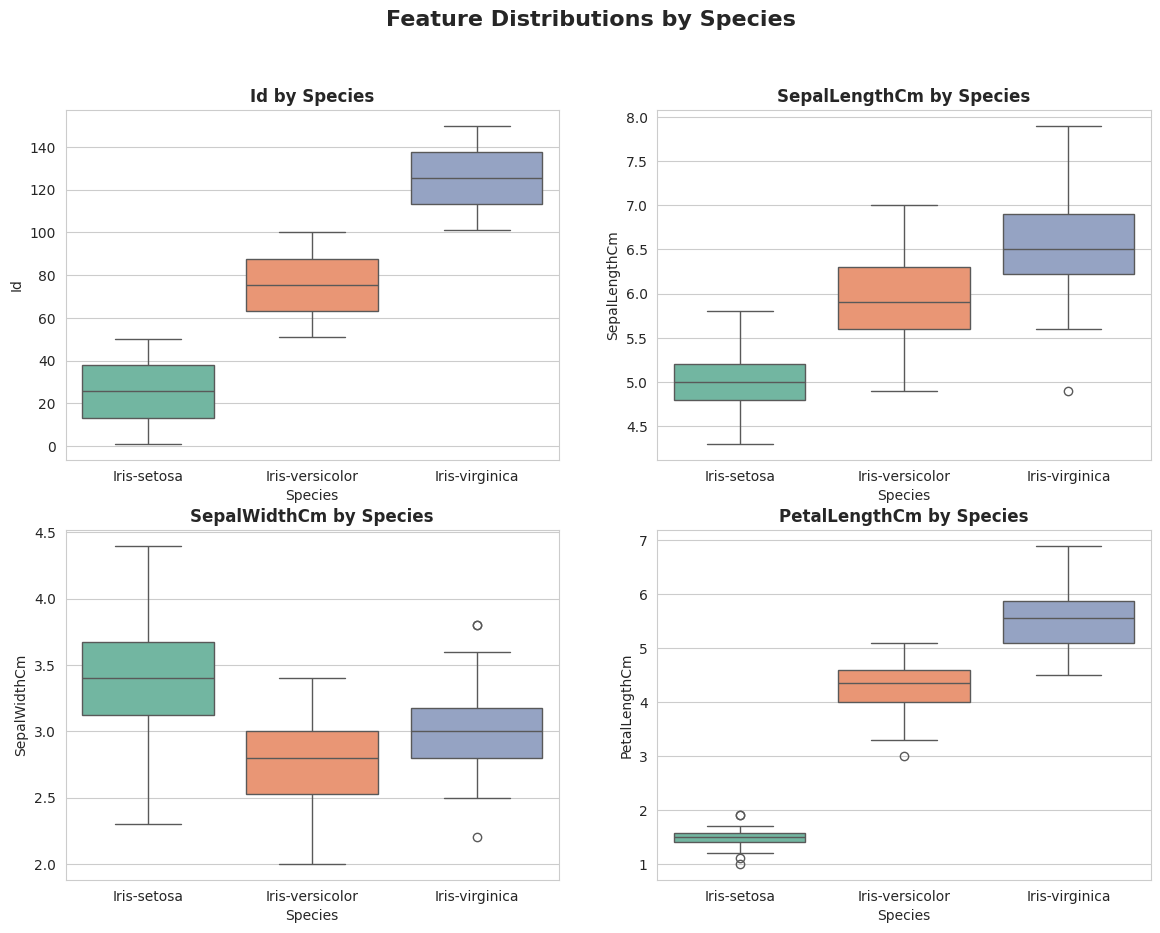

In [8]:
# Enhanced visualizations with seaborn

# Get species column (adjust name if needed)
species_col = df.columns[-1]

# Box plots by species
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=species_col, y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} by Species', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Species')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()